# Init Step

## import library

In [9]:
import tensorflow as tf
import keras as K
from keras.preprocessing.image import ImageDataGenerator
from pathlib import Path
import os
import pathlib
import utils

2024-06-11 15:45:46.385416: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## variables

In [17]:
height, width = 224, 224
fps = 4
n_classes =11
splitedFolder = "overall_dataset"



# Preprocessing of images dataset

In [18]:
import os
cwd = os.getcwd()
print("current dir: {}".format(cwd))

current dir: c:\Users\mkhung6\Desktop\FYP\handGesture_FYP\model


In [19]:
# directory of the images dataset
base_dir = Path('../data')
new_dir = splitedFolder
data_dir = base_dir/ new_dir
train_dir = data_dir/'train'
val_dir = data_dir/'val'
test_dir = data_dir/'test'

# variable for model parameter 
n_epochs = 20
n_train_samples = utils.count_jpgs(train_dir)
n_val_samples = utils.count_jpgs(val_dir)
batch_size = 32

In [20]:
# data augmentation for the training set
train_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   brightness_range=[0.8, 1.2],
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(height,width))
val_generator = train_datagen.flow_from_directory(val_dir, target_size=(height,width))

test_datagen = ImageDataGenerator(rescale=1./255) #use the original image for testing
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(height,width))

Found 9065 images belonging to 11 classes.
Found 3031 images belonging to 11 classes.
Found 3656 images belonging to 11 classes.


## Model Training

In [6]:
import utils
from keras.applications import VGG16
# load pretrained model and weights
conv_layers = VGG16(weights = 'imagenet', include_top=False, input_shape=(height,width,3))
conv_layers.trainable = False
print('per-trained model has been loaded')
conv_layers.summary()



per-trained model has been loaded
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2

In [7]:
# pretraind model
model = K.models.Sequential()
model.add(conv_layers)
model.add(K.layers.Flatten())

# new layers
model.add(K.layers.Dense(256, activation='relu')) 
model.add(K.layers.Dropout(0.1)) # dropout layer to reduce overfitting
model.add(K.layers.Dense(120, activation='relu')) 
model.add(K.layers.Dropout(0.1)) # dropout layer to reduce overfitting
model.add(K.layers.Dense(32, activation='relu'))
model.add(K.layers.Dropout(0.1))

model.add(K.layers.Dense(n_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 120)               30840     
                                                                 
 dropout_1 (Dropout)         (None, 120)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                3

In [8]:
import tensorflow as tf
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(train_generator,
                    steps_per_epoch=n_train_samples/batch_size,
                    epochs=n_epochs,
                    validation_data=val_generator,
                    validation_steps=n_val_samples/batch_size,
                    verbose=2,
                    shuffle=True,
                    )


Epoch 1/20


262/262 - 594s - loss: 0.6103 - acc: 0.7910 - val_loss: 0.0621 - val_acc: 0.9780 - 594s/epoch - 2s/step
Epoch 2/20
262/262 - 588s - loss: 0.0632 - acc: 0.9826 - val_loss: 0.0188 - val_acc: 0.9925 - 588s/epoch - 2s/step
Epoch 3/20
262/262 - 588s - loss: 0.0516 - acc: 0.9834 - val_loss: 0.0276 - val_acc: 0.9943 - 588s/epoch - 2s/step
Epoch 4/20
262/262 - 588s - loss: 0.0450 - acc: 0.9873 - val_loss: 0.0154 - val_acc: 0.9947 - 588s/epoch - 2s/step
Epoch 5/20
262/262 - 588s - loss: 0.0200 - acc: 0.9929 - val_loss: 0.0131 - val_acc: 0.9972 - 588s/epoch - 2s/step
Epoch 6/20
262/262 - 588s - loss: 0.0535 - acc: 0.9859 - val_loss: 0.0116 - val_acc: 0.9964 - 588s/epoch - 2s/step
Epoch 7/20
262/262 - 588s - loss: 0.0157 - acc: 0.9948 - val_loss: 0.0178 - val_acc: 0.9954 - 588s/epoch - 2s/step
Epoch 8/20
262/262 - 588s - loss: 0.0275 - acc: 0.9915 - val_loss: 0.0250 - val_acc: 0.9947 - 588s/epoch - 2s/step
Epoch 9/20
262/262 - 587s - loss: 0.0115 - acc: 0.9963 - val_loss: 0.0144 - v

In [9]:
model.save(splitedFolder + ".h5")

c:\Users\mkhung6\AppData\Local\anaconda3\envs\mediapipe\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# show the accuracy of the model

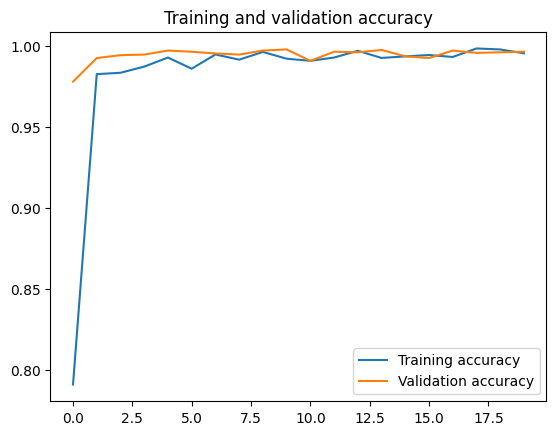

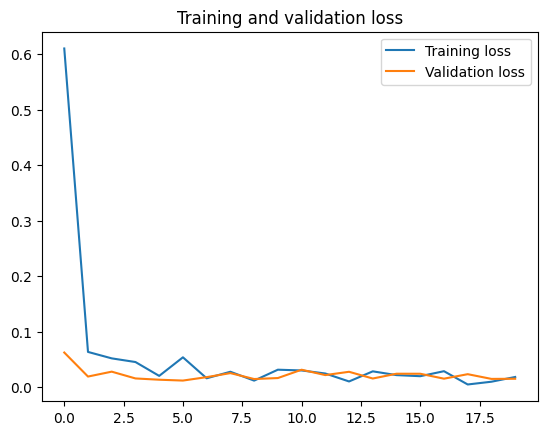

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
import utils
import json
class_indices = train_generator.class_indices
class_indices = {v: k for k, v in class_indices.items()}
print(class_indices)


{0: 'Background', 1: 'ChanDingYin', 2: 'HuoYanYin', 3: 'MiTuoDingYin', 4: 'No_gesture', 5: 'Retsu', 6: 'Rin', 7: 'TaiJiYin', 8: 'Zai', 9: 'Zen', 10: 'ZhiJiXiangYin'}


current dir: /Users/mika/FYP/development/handGesture_FYP/model
114/114 [==============================] - 416s 4s/step - loss: 1.6222 - acc: 0.8457
test acc: 0.8457
Found 3656 images belonging to 11 classes.
115/115 [==============================] - 411s 4s/step
[[143   0   0   0   0   0   0   0   0   0   0]
 [  0 293   3   0   7   0   3  59   0   0   2]
 [  0   0 408   0   0   0   0   0   0   0   0]
 [  0   0   6 321  20   0   0  51   0   0   2]
 [  2   0   0   0 238   0   0   0   0   0   0]
 [  0   0  38   0  39 256   0   0   0   0   0]
 [  0   0  17   0  60   0 231   0   0   0   0]
 [  0   0   0   0  32   0   0 382   0   0   0]
 [  0   0  52   0   9   0  11   0 262   0   0]
 [  0   0   0   0  64   0   0  13   0 240   0]
 [  0   0   2   2  33   0   0  37   0   0 318]]


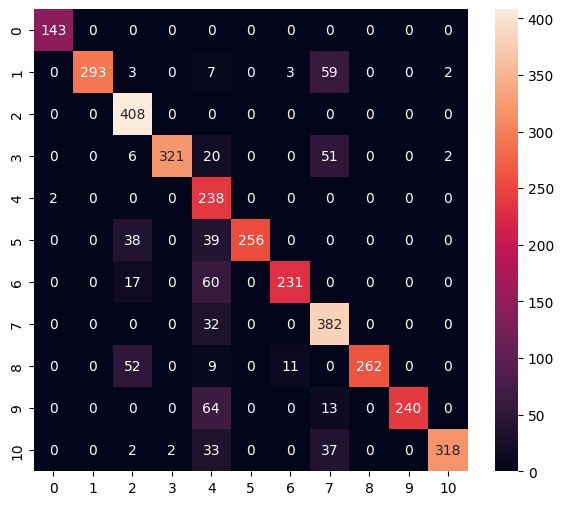

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       143
           1       1.00      0.80      0.89       367
           2       0.78      1.00      0.87       408
           3       0.99      0.80      0.89       400
           4       0.47      0.99      0.64       240
           5       1.00      0.77      0.87       333
           6       0.94      0.75      0.84       308
           7       0.70      0.92      0.80       414
           8       1.00      0.78      0.88       334
           9       1.00      0.76      0.86       317
          10       0.99      0.81      0.89       392

    accuracy                           0.85      3656
   macro avg       0.90      0.85      0.86      3656
weighted avg       0.90      0.85      0.86      3656



In [22]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
#test the accuracy on test set
cwd = os.getcwd()
print("current dir: {}".format(cwd))

model = tf.keras.models.load_model(splitedFolder+".h5")
n_test_set = utils.count_jpgs(test_dir)
_, test_acc = model.evaluate(test_generator, steps=n_test_set/batch_size)
print('test acc: {:.4f}'.format(test_acc))


test_datagen = ImageDataGenerator(rescale=1./255 ) #use the original image for testing
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(height,width), shuffle=False)

#calculate the confusion matrix of the model on test set
y_true = test_generator.classes

# Use the model to predict the labels of the test set
y_pred = model.predict(test_generator)
# Convert predictions to label indices
y_pred = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix of prediction and actual class
cm = confusion_matrix(y_true, y_pred)

print(cm)
labels = train_generator.class_indices.values()
df_cmx = pd.DataFrame(cm, index=labels, columns=labels)
 
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
ax.set_ylim(len(set(y_true)), 0)
plt.show()


print('Classification Report')
print(classification_report(y_true, y_pred))


